In [7]:
from google.colab import files
uploaded = files.upload()


Saving exp_test.csv to exp_test.csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving exp_train.csv to exp_train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
names =[
't',
'q1', 'q2', 'q3',
'dq1', 'dq2', 'dq3',
'I1', 'I2', 'I3',
'eps21', 'eps22', 'eps31', 'eps32',
'ddq1', 'ddq2', 'ddq3'
]
#import io
#df = pd.read_csv(io.BytesIO(uploaded['exp_train.csv']))
#df1 = pd.read_csv(io.BytesIO(uploaded['exp_test.csv']))
df = pd.read_csv('exp_train.csv', header=None,delim_whitespace=False,names=names,na_values=float)
df.head(6)



,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


In [25]:

df.index

RangeIndex(start=0, stop=8000, step=1)

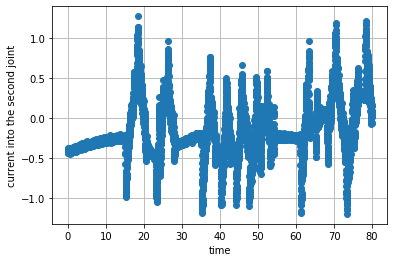

In [26]:
x = np.array(df['t'])
y = np.array(df['I2'])

plt.plot(x,y,'o')
plt.xlabel('time')
plt.ylabel('current into the second joint')
plt.grid(True)
plt.show()

In [27]:
xtrain=df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytrain = df['I2']

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
regr.coef_

array([ 0.06255018,  0.20584896,  0.00118784,  0.00044457, -0.0031362 ,
        0.00603298,  0.05487097])

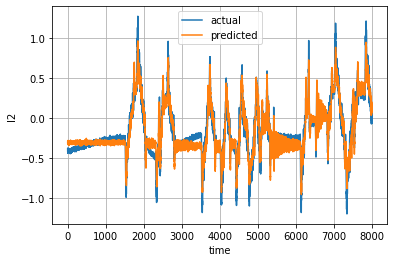

In [29]:
y_tr_pred = regr.predict(xtrain)

plt.plot(df.index, ytrain)
plt.plot(df.index, y_tr_pred)
plt.xlabel('time')
plt.ylabel('I2')
plt.legend(['actual', 'predicted'])
plt.grid()
plt.show()

In [30]:
RSS_train = np.mean((y_tr_pred-ytrain)**2)/(np.std(ytrain)**2)
print("Normalized RSS of the train sample = {0:f}".format(RSS_train))

Normalized RSS of the train sample = 0.095833


In [31]:
df2 = pd.read_csv('exp_test.csv', header=None,delim_whitespace=False,names=names,na_values=float)
                 
df2.index

RangeIndex(start=0, stop=8000, step=1)

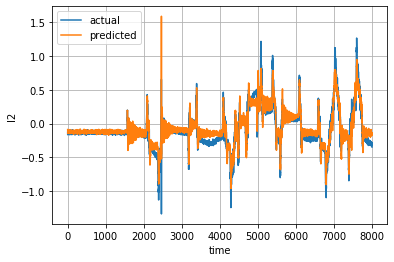

In [32]:
xtest=df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytest=df2['I2']
y_te_pred = regr.predict(xtest)

plt.plot(df2.index, ytest)
plt.plot(df2.index, y_te_pred)
plt.xlabel('time')
plt.ylabel('I2')
plt.legend(['actual', 'predicted'])
plt.grid()
plt.show()

In [33]:
RSS_test = np.mean((y_te_pred-ytest)**2)/(np.std(ytest)**2)
print("Normalized RSS of the test sample = {0:f}".format(RSS_test))


Normalized RSS of the test sample = 0.126780
